# Algotytm przecinania się odcinków na płaszczyźnie

In [ ]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [357]:
import numpy as np
import matplotlib.pyplot as plt
from tests.test4 import Test
from visualizer.main import Visualizer
from enum import Enum
from time import time, sleep
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os


# Generowanie zbiorów na potrzeby testów

### Zbiór A
Zbiór do wykazania, że algorytm zamiatania jest dużo lepszy od naiwnego podejścia

In [396]:
def generate_set_a(n = 10, max_y = 100, min_y = 0, incline_change = -10, min_x = 0, max_x = 100):
    dy = (max_y - min_y)/n
    result = []
    current_y = max_y
    while current_y > min_y:
        pl = (min_x,current_y)
        pr = (max_x,current_y+incline_change)
        result.append((pl,pr))
        current_y -= dy
    return result

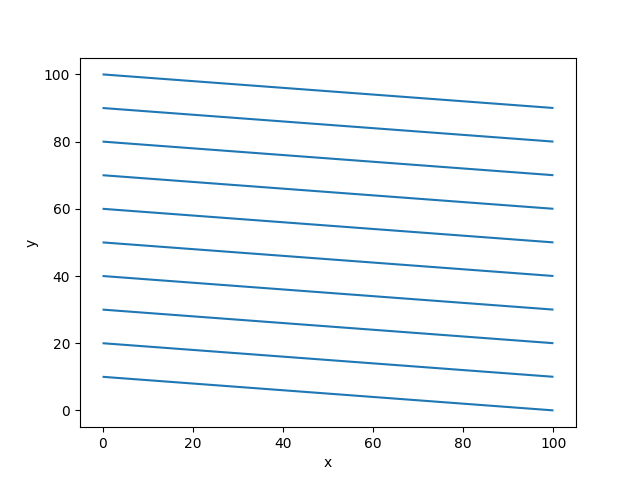

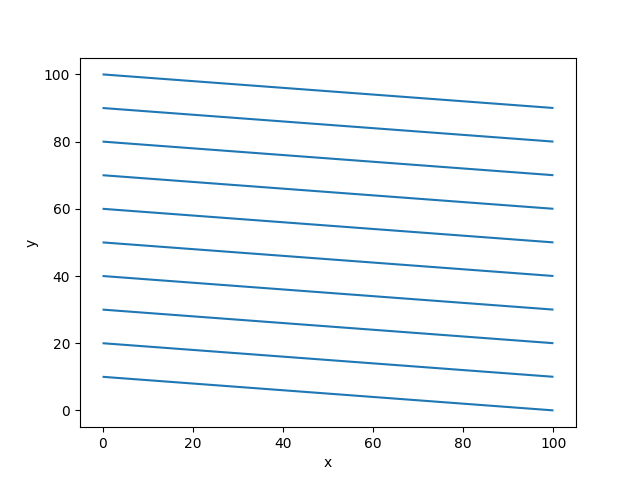

In [397]:
vis = Visualizer()
sections = generate_set_a()
vis.add_line_segment(sections)
# vis.add_point(points, color='red')
vis.show()
vis.save("Zbiór_A")

### Zbiór B
Zbiór do przedstawienia nieprzyjemnego przypadku dla algorytmu zamiatania, gdzie P = O(n^2)

In [398]:
def generate_set_b(n=10):
    max_y, min_y = 100,0
    incline_change = -10
    min_x,xr_o = 0,100
    max_x = xr_o
    result = []
    current_y = max_y
    dx = (min_x - max_x)/(2*n)
    d = dx
    eps = 1e-10
    for i in range(n):
        pl = (min_x,current_y)
        pr = (max_x,current_y+incline_change)
        result.append((pl,pr))
        min_x += dx
        max_x -= dx * i
        if abs((min_x - max_x)/2) < eps:
            # Generated a vertical line, quit now
            print(i)
            break

    return result

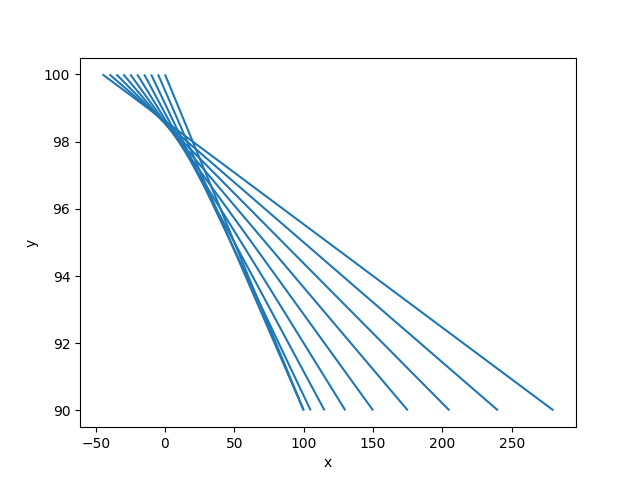

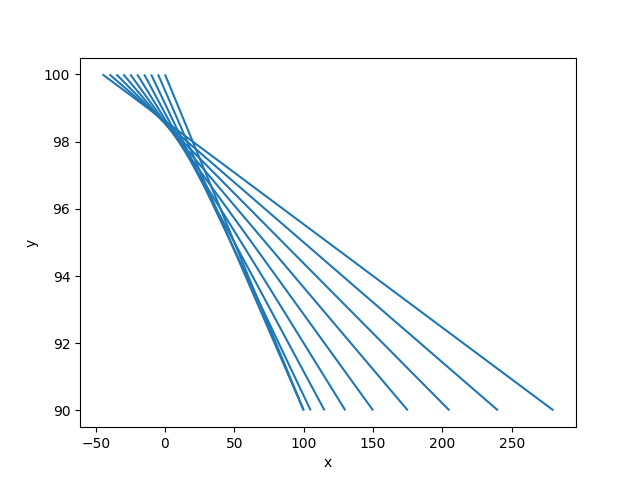

No such comm: 80e363fcbed840dea28631c648d768ef


In [ ]:
vis = Visualizer()
sections = generate_set_b(10)
vis.add_line_segment(sections)
vis.show()
vis.save("Zbiór_B")

### Zbiór C
Zbiór do testowania ilości przecięć dla P rzędu n

In [ ]:
def generate_set_c(n = 10, max_y = 100, min_y = 0, incline_change = -10, min_x = 0, max_x = 100):
    result = generate_set_a(n-1)
    result.append(((min_x,min_y-abs(incline_change)),(max_x,max_y+abs(incline_change))))
    return result

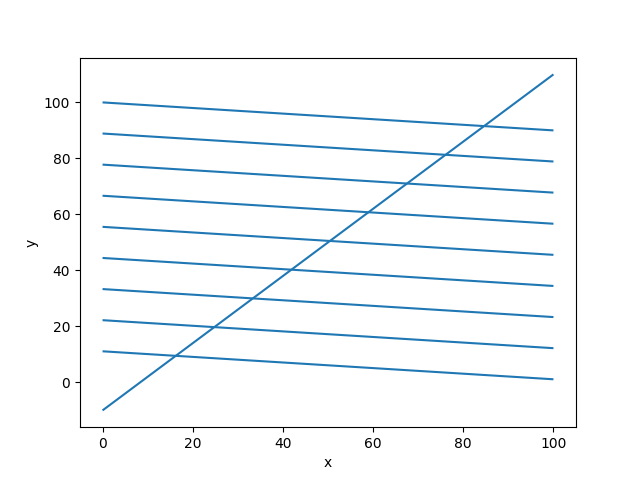

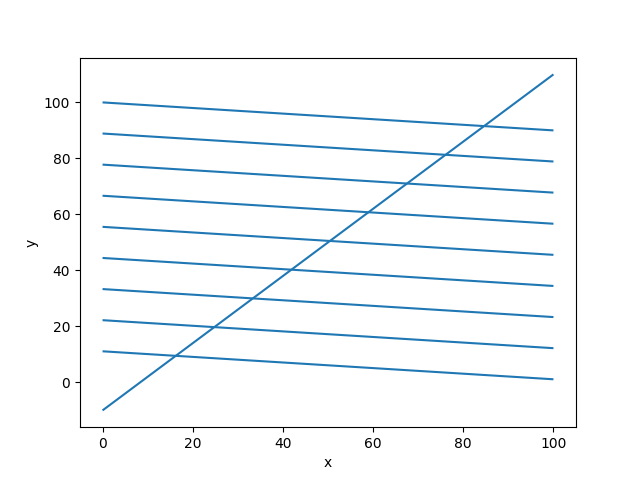

In [ ]:
vis = Visualizer()
sections = generate_set_c(10)
vis.add_line_segment(sections)
vis.show()
vis.save("Zbiór_C")

### Zbiór D

In [ ]:
def generate_set_d(n=10, max_y = 100, min_x = 0, max_x = 100, incline_change = -100):

    result = []
    current_y = max_y
    dx = (min_x - max_x)/(2*n)
    d = dx
    eps = 1e-10
    for i in range(n):
        pl = (min_x,current_y)
        pr = (max_x,current_y+incline_change)
        result.append((pl,pr))
        min_x += dx
        max_x -= dx
        if abs((min_x - max_x)/2) < eps:
            # Generated a vertical line, quit now
            print(i)
            break

    return result

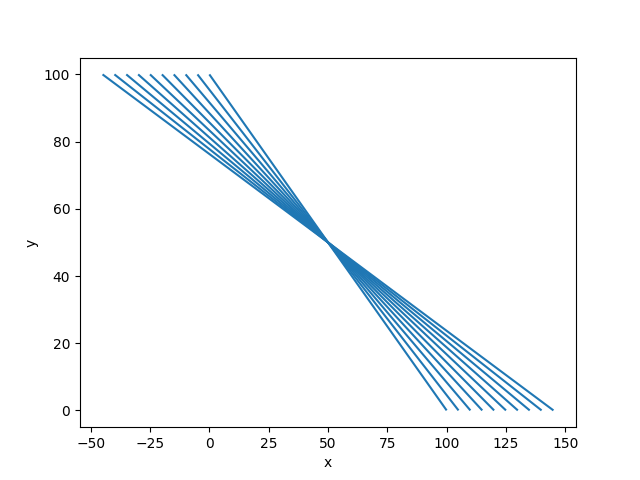

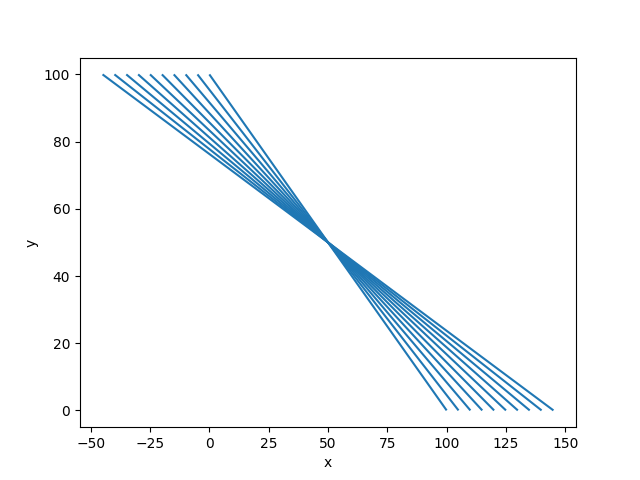

In [ ]:
vis = Visualizer()
sections = generate_set_d(10)
vis.add_line_segment(sections)
vis.show()
vis.save("Zbiór_D")

### Zbiór E

In [401]:
from random import uniform, randint
def generate_set_e(n=10,max_x=100, max_y=100):
    result = []
    for _ in range(n):
        x1 = uniform(0,max_x)
        y1 = uniform(0,max_y)
        x2 = uniform(0,x1) if randint(0,1) == 1 else uniform(x1,max_x)
        y2 = uniform(0,max_y)
        result.append(((x1,y1),(x2,y2)))
    return result

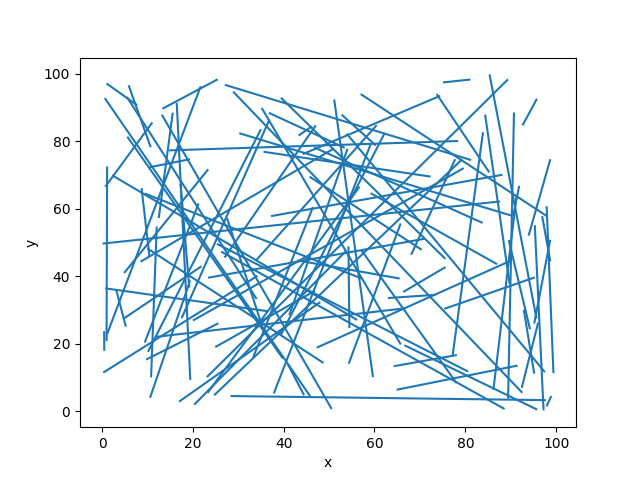

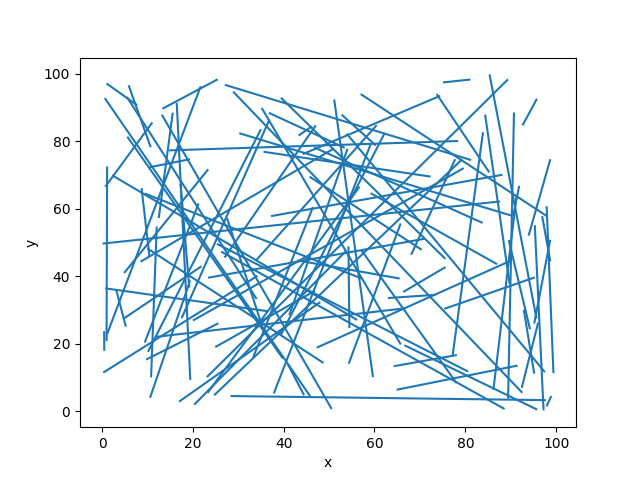

In [402]:
vis = Visualizer()
sections = generate_set_e(100,100,100)
vis.add_line_segment(sections)
vis.show()
vis.save("Zbiór_E")

# Przydatne funkcje 

### Wpisywanie wyników testów czasowych do tabeli do pliku LaTeX

In [403]:
def create_tex_table(table_name,data):
    
    latex_template = r"""
\begin{table}[H]
    \renewcommand{\tablename}{Tabela}

    \centering
    \small
    \caption{Tabela różnic czasów obliczeń}
    \resizebox{\textwidth}{!}{
    \begin{tabular}{@{}lllc@{}}
        \toprule
                Ilość odcinków & Algorytm brutalny &  Algorytm z drzewem & Ilość przecięć 
        \\ \midrule
"""
    
    def wrap(number):
        return str(round(number,4)).replace('.',',')
    for row in data:
        value_brut = row['brut']
        value_tree = row['tree']
        unit_brut = ' \\mu s'
        unit_tree = ' \\mu s'
        if int(value_brut) >= 1000:
            unit_brut = ' ms'
            value_brut /= 1000
        if int(value_tree) >= 1000:
            unit_tree = ' ms'
            value_tree /= 1000
        if int(value_brut) >= 1000:
            unit_brut = ' s'
            value_brut /= 1000
        if int(value_tree) >= 1000:
            unit_tree = ' s'
            value_tree /= 1000

        brut_time = wrap(value_brut) + unit_brut
        tree_time = wrap(value_tree) + unit_tree
        latex_template += f"        {row['segments']} & {brut_time} & {tree_time} & {row['cuts']}\\\\ \n"

    latex_template += r"""        \bottomrule
    \end{tabular}
}
    \label{table:generator4}
    \small
    \normalsize
\end{table}
"""

    output_filename = f"{table_name}.tex"
    with open(output_filename, "w") as f:
        f.write(latex_template)

    print(f"LaTeX table has been written to {output_filename}")

### Wpisywanie do pliku CSV

In [404]:
def csv_dump(table_name,data):
    
    content = "Ilość odcinków;Algorytm brutalny;Algorytm z drzewem; Ilość przecięć\n"
    
    def wrap(number):
        return str(round(number,4)).replace('.',',')
    for row in data:
        value_brut = row['brut']
        value_tree = row['tree']
        unit_brut = ' mikro s'
        unit_tree = ' mikro s'
        if int(value_brut) >= 1000:
            unit_brut = ' ms'
            value_brut /= 1000
        if int(value_tree) >= 1000:
            unit_tree = ' ms'
            value_tree /= 1000
        if int(value_brut) >= 1000:
            unit_brut = ' s'
            value_brut /= 1000
        if int(value_tree) >= 1000:
            unit_tree = ' s'
            value_tree /= 1000
        brut_time = wrap(value_brut) + unit_brut
        tree_time = wrap(value_tree) + unit_tree
        content = content + f"{row['segments']};{brut_time};{tree_time};{row['cuts']}\n"
    output_filename = f"{table_name}.csv"
    with open(output_filename, "w") as f:
        f.write(content)

    print(f"CSV data table has been written to {output_filename}")

### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

In [405]:
def draw_example_1():
    vis = Visualizer()
    line_segments = generate_set_a()

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


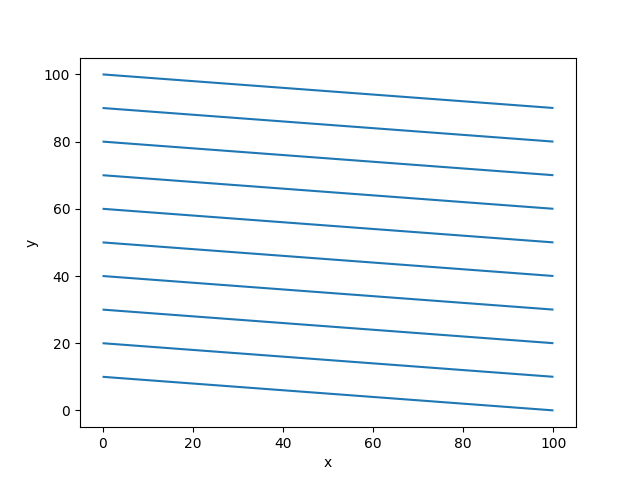

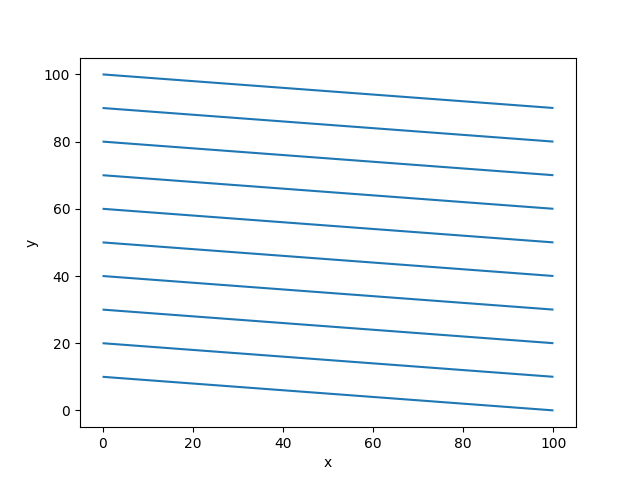

In [406]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

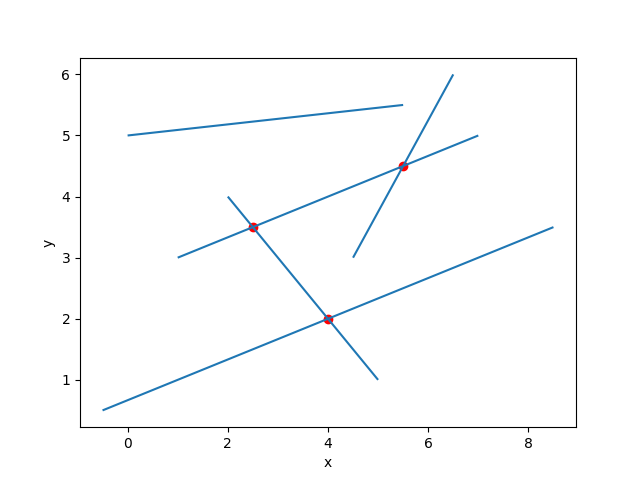

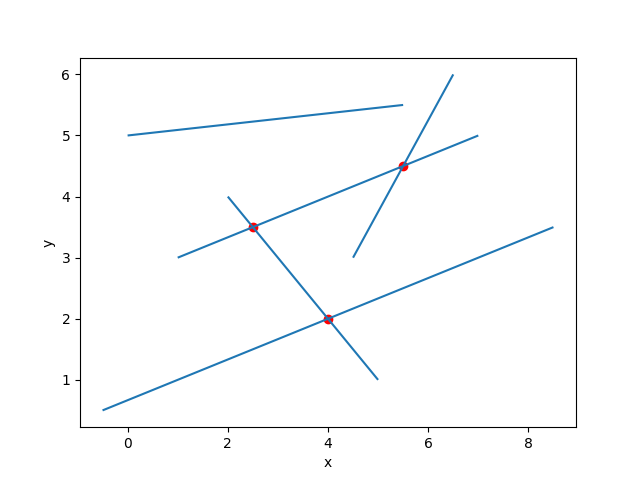

In [407]:
draw_example_2()

### Wizualizacja pojedynczej klatki algorytmu

In [408]:
def draw_state(sections,current,points,events,current_point):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    dy = 1e-5

    # Wszystkie odcinki
    for section in sections:
        x_vals, y_vals = [section[0][0], section[1][0]], [section[0][1], section[1][1]]
        ax.plot(x_vals, y_vals, color='blue', zorder=1, lw=1)

    # Odcinki aktywne
    for section in current:
        x_vals, y_vals = [section[0][0], section[1][0]], [section[0][1], section[1][1]]
        ax.plot(x_vals, y_vals, color='red', zorder=1, lw=1)

    # Punkty punkty obsłużone
    for (x, y,_) in points:
        ax.scatter(x, y, color='red', zorder=1, label=f'Punkty obsłużone')

    # Punkty zdarzeń
    for (x,y,_) in events:
        ax.scatter(x, y, color='green', zorder=1, label=f'Punkty zdarzeń')
    
    # Miotła
    ax.axline((current_point.x,current_point.y),(current_point.x,current_point.y+dy), color='red', label="Miotła")

    ax.autoscale()
    plt.show()
    # plt.savefig(filename)
    plt.close()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [409]:
from random import uniform, randint
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    result = []
    for _ in range(n):
        x1 = uniform(0,max_x)
        y1 = uniform(0,max_y)
        x2 = uniform(0,x1) if randint(0,1) == 1 else uniform(x1,max_x)
        y2 = uniform(0,max_y)
        result.append(((x1,y1),(x2,y2)))
    return result

In [410]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.047s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [411]:
section = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

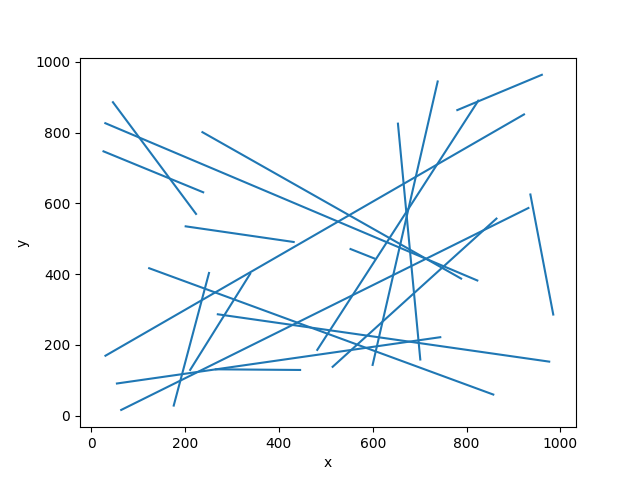

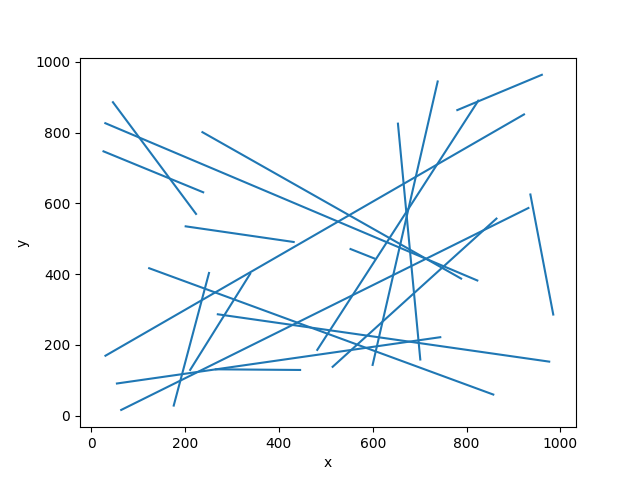

In [412]:
vis = Visualizer()

vis.add_line_segment(section)
# vis.add_point(points, color='red')
vis.show()

Komórka poniżej daje możliwość wprowadzania sekcji myszką i zapisywania ich do pliku

Button(description='Wyczyść punkty', style=ButtonStyle())

Button(description='Zapisz punkty', style=ButtonStyle())

Output()

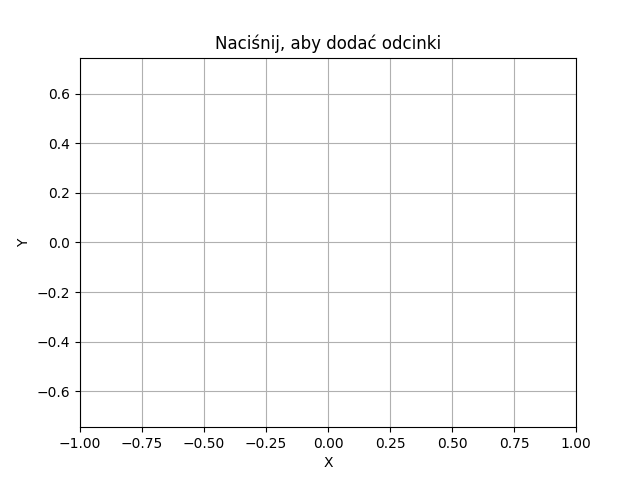

In [413]:
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import Button, Output, VBox
from ipywidgets import Button, Output, VBox
from matplotlib.figure import Figure
from IPython.display import display

points1 = []
points2 = []
limit = 4
output = Output()
fig, ax = plt.subplots()  # Create both figure and axis
canvas = fig.canvas # Use the Jupyter-compatible canvas
save_to_file = False
filename = "wyniki.txt"
state = True
previous_point = None
current_point = None
sections = []
# Helper functions
def previous_p(index, n):
    return (index + n - 1) % n

def next_p(index, n):
    return (index + 1) % n

def is_y_monotonic(polygon):
    n = len(polygon)
    min_index = get_min_index(polygon)
    max_index = get_max_index(polygon)
    i = max_index
    while min_index != i:
        j = next_p(i, n)
        if polygon[i][1] < polygon[j][1]:
            return False
        i = next_p(i, n)
    i = min_index
    while max_index != i:
        j = next_p(i, n)
        if polygon[i][1] > polygon[j][1]:
            return False
        i = next_p(i, n)
    return True

def det(a, b, c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

def get_max_index(points):
    return max(range(len(points)), key=lambda i: (points[i][1], -points[i][0]))

def get_min_index(points):
    return min(range(len(points)), key=lambda i: (points[i][1], points[i][0]))

def divide(polygon):
    n = len(polygon)
    left_right = [1] * n
    min_index = get_min_index(polygon)
    max_index = get_max_index(polygon)
    left_right[max_index] = 0
    left_right[min_index] = 1
    i = max_index
    while i != min_index:
        left_right[i] = -1
        i = next_p(i, n)
    i = min_index
    while i != max_index:
        left_right[i] = 1
        i = next_p(i, n)
    return left_right

def check_if_inside(a, b, c, side, epsilon=1e-18):
    d = det(a, b, c)
    return side * d > epsilon

def build_events(polygon):
    n = len(polygon)
    starter = get_max_index(polygon)
    end = get_min_index(polygon)
    left = previous_p(starter, n)
    right = next_p(starter, n)
    result = [starter]
    while left != end or right != end:
        if polygon[left][1] > polygon[right][1]:
            result.append(left)
            left = previous_p(left, n)
        elif polygon[left][1] < polygon[right][1]:
            result.append(right)
            right = next_p(right, n)
        else:
            if polygon[left][0] < polygon[right][0]:
                result.append(left)
                left = previous_p(left, n)
            else:
                result.append(right)
                right = next_p(right, n)

    result.append(end)
    return starter, result[1], result[2:]

def triangulation(polygon):
    if not is_y_monotonic(polygon):
        print("Not monotonic!")
        return []
    n = len(polygon)
    triangulation_result = []
    left_right = divide(polygon)
    start, second, events = build_events(polygon)
    stack = [start, second]

    for event in events:
        current_chain = left_right[event]
        if left_right[stack[-1]] != current_chain:
            last = stack[-1]
            while len(stack) >= 1:
                top = stack.pop()
                if abs(event - top) > 1 and abs(event - top) != n - 1:
                    triangulation_result.append([event, top])
            stack.append(last)
            stack.append(event)
        else:
            while len(stack) > 1 and check_if_inside(polygon[event], polygon[stack[-1]], polygon[stack[-2]], left_right[stack[-1]]):
                if abs(event - stack[-2]) > 1 and abs(event - stack[-2]) != n - 1:
                    triangulation_result.append([event, stack[-2]])
                stack.pop()
            stack.append(event)
    return triangulation_result

def add_polygon(triangulation, polygon):
    n = len(polygon)
    return triangulation + [(i, (i + 1) % n) for i in range(n)]

def update_plot():
    global sections, points1, points2
    ax.clear()
    ax.set_title("Naciśnij, aby dodać odcinki")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)
    ax.axis("equal")
    x_range = (-1, 1)
    y_range = (-1, 1)
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    if sections:
        sections_1, sections_2 = zip(*sections)
        for i in range(len(sections_1)):
            x = (sections_1[i][0],sections_2[i][0])
            y = (sections_1[i][1],sections_2[i][1])
            ax.plot(x, y, color="blue")
        x_coords, y_coords = zip(*points1)
        ax.scatter(x_coords, y_coords, color="green", s=10, label="Points")
        x_coords, y_coords = zip(*points2)
        ax.scatter(x_coords, y_coords, color="red", s=10, label="Points")

    canvas.draw_idle()

def onclick(event):
    global state,previous_point,current_point,sections,points1,points2
    if event.xdata is not None and event.ydata is not None:
        if state:
            previous_point = (event.xdata, event.ydata)
            points1.append(previous_point)
        else:
            current_point = (event.xdata, event.ydata)
            points2.append(current_point)
            sections.append((previous_point,current_point))
        state = not state
        # polygon.append((event.xdata, event.ydata))
        update_plot()


clear_button = Button(description="Wyczyść punkty")
save_button = Button(description="Zapisz punkty")
def clear_points(button):
    global sections, points1, points2
    sections = []
    points1 = []
    points2 = []
    update_plot()
def save_points(button):
    global polygon
    with open("points.txt","w") as f:
        f.write(str(sections))
        print(sections)
clear_button.on_click(clear_points)
save_button.on_click(save_points)
canvas.mpl_connect('button_press_event', onclick)

update_plot()
display(clear_button, save_button , output)
ui = VBox([clear_button, output, canvas])
display(ui)



Uzupełnij funkcję ```is_intersection```

In [414]:
def on_segment(p, q, r): 
    if ( (q.x <= max(p.x, r.x)) and (q.x >= min(p.x, r.x)) and 
           (q.y <= max(p.y, r.y)) and (q.y >= min(p.y, r.y))): 
        return True
    return False
  
def det(a,b,c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

def orientation(a, b ,c , epsilon = 1e-18):  
    d = det(a,b,c)
    if (d > epsilon): 
        return 1
    elif (d < -epsilon): 
        return 2
    else: 
        return 0

epsilon = 1e-18

def in_line(value):
    return epsilon > abs(value)


def doIntersect(p1,q1,p2,q2): 
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2) 
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
    if ((o1 != o2) and (o3 != o4)): 
        return True
    if ((o1 == 0) and in_line(on_segment(p1, p2, q1))): 
        return True
    if ((o2 == 0) and in_line(on_segment(p1, q2, q1))): 
        return True
    if ((o3 == 0) and in_line(on_segment(p2, p1, q2))): 
        return True
    if ((o4 == 0) and in_line(on_segment(p2, q1, q2))): 
        return True
    return False

def get_parameters(section):
    P1,P2 = section
    x1,y1,_ = P1
    x2,y2,_ = P2
    a = (y1-y2)/(x1-x2)
    b = y1 - a*x1
    return (a,b)

def get_intersection(section1,section2):
    a1,b1 = get_parameters(section1)
    a2,b2 = get_parameters(section2)
    x = (b1-b2)/(a2-a1)
    y = a1*x+b1
    return (x,y)

def is_intersection_brut(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    n = len(sections)    
    vis1 = Visualizer()
    vis1.add_line_segment(sections, color = "green")
    n = len(sections)
    interpoints = []
    for i in range(n):
        for j in range(i+1, n):
            if(doIntersect(*sections[i], *sections[j])):
                return True
    return False


In [415]:
Test().runtest(2, is_intersection_brut)
# Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

In [416]:
# Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [417]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    raise Exception("Unimplemented")


### Klasy Point i LineSegment

Klasy przechowujące informacje na temat prezentowanych figur

In [418]:
E = 1e-4
D = 1e-8

from typing import Self

class PointType(Enum):
    START = 0
    END = 1
    CROSS = 2

class Point:
    def __init__(self,x,y,line_index,point_type=PointType.START,other_line=None):
        self.x = x
        self.y = y
        self.line_index = line_index
        self.other_line = other_line
        self.point_type = point_type
    
    def __str__(self):
        # return f"({round(self.x,3)},{round(self.y,3)})"    
        return f"({self.x},{self.y})"
    
    def __eq__(self,other):
        if other is None or not isinstance(other,Point):
            return False
        return self.x == other.x
    
    def __hash__(self):
        return hash((self.x))
    
    def __lt__(self,other):
        if other is None or not isinstance(other,Point):
            return False
        if other == None:
            return False
        return self.x < other.x
    
    def __gt__(self,other):
        if other is None or not isinstance(other,Point):
            return False
        if other == None:
            return True
        return self.x > other.x
    
    def __le__(self,other):
        return self == other or self < other
    
    def __ge__(self,other):
        return self == other or self > other
    
    def greter(self, other, x):
        if (self.f(x) > other.f(x)):
            return self
        return other
    
    def smaller(self, other, x):
        if (self.f(x) < other.f(x)):
            return self
        return other
    def __iter__(self):
        # return iter(((self.x, self.y),self.line_index,self.other_line))
        return iter((self.x,self.y,(self.line_index,self.other_line)))
    def __getitem__(self,index):
        match index:
            case 0: 
                return self.x
            case 1:
                return self.y
            case 2:
                return self.point_type
            case 3:
                return self.line_index
            case 4:
                return self.other_line
            case _:
                raise IndexError("Point index out of range")

class LineSegment:
    # Statyczny x - dla każdej klasy dla ułatwienia porównań 
    x = 0
    def __init__(self,p1: Point,p2: Point,index):
        if p1 > p2:
            p1, p2 = p2, p1
        self.pl = p1
        self.pr = p2
        self.pl.point_type = PointType.START
        self.pr.point_type = PointType.END
        self.a, self.b = self.get_parameters(self.pl,self.pr)
        self.index = index
    
    def get_parameters(self,P1,P2):
        x1,y1 = P1.x,P1.y
        x2,y2 = P2.x,P2.y
        a = (y1-y2)/(x1-x2)
        b = y1 - a*x1
        return (a,b)
    
    def f(self):
        return self.a * LineSegment.x + self.b
        
    def __eq__(self, other: Self):
        if(other == None): return False
        return self.pl == other.pl and self.pr == other.pr

    def __lt__(self, other: Self):
        if(other == None): return False
        return self.f()<other.f()
        
    def __hash__(self):
        return hash((self.pl, self.pr))
  
    def __str__(self):
        return f"ID: {self.index} SP: {self.pl} EP: {self.pr} a: {self.a} b: {self.b}" 
   

    def compare(self,a,b,c):
        
        EPS = 10**(-24)

        result = det(a,b,c)
        if(abs(result) <= EPS):
            return 0
        elif(result < 0):
            return -1
        elif(result > 0):
            return 1
    
    def intersects___(self, other):
        s1_point_start = self.pl
        s1_point_end = self.pr
        s2_point_start = other.pl
        s2_point_end = other.pr
        
        return (
            self.compare(s1_point_start, s1_point_end, s2_point_start) != self.compare(s1_point_start, s1_point_end, s2_point_end )
            and
            self.compare(s2_point_start,s2_point_end,s1_point_start) != self.compare(s2_point_start, s2_point_end, s1_point_end)
        )

    def intersects(self: Self, other: Self):
        p1, p2 = self.pl,self.pr
        q1, q2 = self.pl,other.pr

        # Find the orientations
        o1 = orientation(p1, p2, q1)
        o2 = orientation(p1, p2, q2)
        o3 = orientation(q1, q2, p1)
        o4 = orientation(q1, q2, p2)

        # General case: two segments intersect if orientations differ
        if o1 != o2 and o3 != o4:
            return True

        # Special cases: Check if points are collinear and lie on the segments
        if o1 == 0 and on_segment(p1, q1, p2):
            return True
        if o2 == 0 and on_segment(p1, q2, p2):
            return True
        if o3 == 0 and on_segment(q1, p1, q2):
            return True
        if o4 == 0 and on_segment(q1, p2, q2):
            return True

        return False
    
    def __iter__(self):
        return iter((self.pl,self.pr))

## Klasy potrzebne do implementacji find_intersections

### Klasa RedBlackTree
Podstawowe drzewo czerwono-czarne, implementacja z 

In [419]:
from abc import ABC
from typing import Self

class Node:
      # Constructor to initialize node of RB Tree
    def __init__(self: Self, value, color='red'):
        self.value: Comparable = value
        self.color = color
        self.left: (Node | None) = None
        self.right: (Node | None) = None
        self.parent: (Node | None) = None

    # function to get the grandparent of node
    def grandparent(self: Self):
        if self.parent is None:
            return None
        return self.parent.parent

    # function to get the sibling of node
    def sibling(self: Self):
        if self.parent is None:
            return None
        if self == self.parent.left:
            return self.parent.right
        return self.parent.left

    # function to get the uncle of node
    def uncle(self: Self):
        if self.parent is None:
            return None
        return self.parent.sibling()

class RedBlackTree:
    def __init__(self: Self):
        self.root = None

    def search(self: Self, value):
        curr_node = self.root
        while curr_node is not None:
            if value == curr_node.value:
                return curr_node
            elif value < curr_node.value:
                curr_node = curr_node.left
            else:
                curr_node = curr_node.right
        return None

    def insert(self: Self, value):
        # Regular insertion
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
        else:
            curr_node = self.root
            while True:
                if value < curr_node.value:
                    if curr_node.left is None:
                        curr_node.left = new_node
                        new_node.parent = curr_node
                        break
                    else:
                        curr_node = curr_node.left
                else:
                    if curr_node.right is None:
                        curr_node.right = new_node
                        new_node.parent = curr_node
                        break
                    else:
                        curr_node = curr_node.right
        self.insert_fix(new_node)

    def insert_fix(self: Self, new_node: Node):
        while new_node.parent and new_node.parent.color == 'red':
            if new_node.parent == new_node.grandparent().left:
                uncle = new_node.uncle()
                if uncle and uncle.color == 'red':
                    new_node.parent.color = 'black'
                    uncle.color = 'black'
                    new_node.grandparent().color = 'red'
                    new_node = new_node.grandparent()
                else:
                    if new_node == new_node.parent.right:
                        new_node = new_node.parent
                        self.rotate_left(new_node)
                    new_node.parent.color = 'black'
                    new_node.grandparent().color = 'red'
                    self.rotate_right(new_node.grandparent())
            else:
                uncle = new_node.uncle()
                if uncle and uncle.color == 'red':
                    new_node.parent.color = 'black'
                    uncle.color = 'black'
                    new_node.grandparent().color = 'red'
                    new_node = new_node.grandparent()
                else:
                    if new_node == new_node.parent.left:
                        new_node = new_node.parent
                        self.rotate_right(new_node)
                    new_node.parent.color = 'black'
                    new_node.grandparent().color = 'red'
                    self.rotate_left(new_node.grandparent())
        self.root.color = 'black'

    def remove(self: Self, value: Node):
        node_to_remove = self.search(value)

        if node_to_remove is None:
            return

        if node_to_remove.left is None or node_to_remove.right is None:
            self._replace_node(
                node_to_remove, node_to_remove.left or node_to_remove.right)
        else:
            successor = self._find_min(node_to_remove.right)
            node_to_remove.value = successor.value
            self._replace_node(successor, successor.right)

        self.remove_fix(node_to_remove)

    def remove_fix(self: Self, x: Node):
        while x != self.root and x.color == 'black':
            if x == x.parent.left:
                sibling = x.sibling()
                if sibling.color == 'red':
                    sibling.color = 'black'
                    x.parent.color = 'red'
                    self.rotate_left(x.parent)
                    sibling = x.sibling()
                if (sibling.left is None or sibling.left.color == 'black') and (sibling.right is None or sibling.right.color == 'black'):
                    sibling.color = 'red'
                    x = x.parent
                else:
                    if sibling.right is None or sibling.right.color == 'black':
                        sibling.left.color = 'black'
                        sibling.color = 'red'
                        self.rotate_right(sibling)
                        sibling = x.sibling()
                    sibling.color = x.parent.color
                    x.parent.color = 'black'
                    if sibling.right:
                        sibling.right.color = 'black'
                    self.rotate_left(x.parent)
                    x = self.root
            else:
                sibling = x.sibling()
                if sibling.color == 'red':
                    sibling.color = 'black'
                    x.parent.color = 'red'
                    self.rotate_right(x.parent)
                    sibling = x.sibling()
                if (sibling.left is None or sibling.left.color == 'black') and (sibling.right is None or sibling.right.color == 'black'):
                    sibling.color = 'red'
                    x = x.parent
                else:
                    if sibling.left is None or sibling.left.color == 'black':
                        sibling.right.color = 'black'
                        sibling.color = 'red'
                        self.rotate_left(sibling)
                        sibling = x.sibling()
                    sibling.color = x.parent.color
                    x.parent.color = 'black'
                    if sibling.left:
                        sibling.left.color = 'black'
                    self.rotate_right(x.parent)
                    x = self.root
        x.color = 'black'

    def rotate_left(self: Self, node: Node):
        right_child = node.right
        node.right = right_child.left

        if right_child.left is not None:
            right_child.left.parent = node

        right_child.parent = node.parent

        if node.parent is None:
            self.root = right_child
        elif node == node.parent.left:
            node.parent.left = right_child
        else:
            node.parent.right = right_child

        right_child.left = node
        node.parent = right_child

    def rotate_right(self: Self, node: Node):
        left_child = node.left
        node.left = left_child.right

        if left_child.right is not None:
            left_child.right.parent = node

        left_child.parent = node.parent

        if node.parent is None:
            self.root = left_child
        elif node == node.parent.right:
            node.parent.right = left_child
        else:
            node.parent.left = left_child

        left_child.right = node
        node.parent = left_child

    def _replace_node(self: Self, old_node: Node, new_node: Node):
        if old_node.parent is None:
            self.root = new_node
        else:
            if old_node == old_node.parent.left:
                old_node.parent.left = new_node
            else:
                old_node.parent.right = new_node
        if new_node is not None:
            new_node.parent = old_node.parent

    def _find_min(self: Self, node: Node):
        while node.left is not None:
            node = node.left
        return node

    def _inorder_traversal(self: Self, node: Node):
        if node is not None:
            self._inorder_traversal(node.left)
            print(node.value, end=" ")
            self._inorder_traversal(node.right)

    def insert(self: Self, value):
        # Regular BST insert
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
        else:
            curr_node = self.root
            while True:
                  # If the node is in the left subtree
                if value < curr_node.value:
                    if curr_node.left is None:
                        curr_node.left = new_node
                        new_node.parent = curr_node
                        break
                    else:
                        curr_node = curr_node.left
                # If the node is in the right subtree
                else:
                    if curr_node.right is None:
                        curr_node.right = new_node
                        new_node.parent = curr_node
                        break
                    else:
                        curr_node = curr_node.right
        self.insert_fix(new_node)

    def find_next(self: Self, value):
        return self.find_next_from(self.root, value, None)

    def find_next_from(self: Self, current: Node, value, next_: Node):
        """
        Recursively finds the next node (smallest value greater than the given value)
        current: Node - current node to search from
        value: Comparable - value to find the next for
        next_: Node - currently tracked potential "next" node
        """
        if current is None:
            return next_.value if next_ else None  # Return the value of next_ if found

        if current.value > value:
            return self.find_next_from(current.left, value, current)
        else:
            return self.find_next_from(current.right, value, next_)

    def find_prev(self: Self, value):
        return self.find_prev_from(self.root, value, None)

    def find_prev_from(self: Self, current: Node, value, prev: Node):
        """
        Recursively finds the previous node (largest value smaller than the given value)
        current: Node - current node to search from
        value: Comparable - value to find the previous for
        prev: Node - currently tracked potential "previous" node
        """
        if current is None:
            return prev.value if prev else None  # Return the value of prev if found

        if current.value < value:  # A potential "previous" node
            return self.find_prev_from(current.right, value, current)
        else:  # current.value >= value
            return self.find_prev_from(current.left, value, prev)

    def set_x(self,x):
        LineSegment.x = x

    def get_previous_and_following_segment(self,segment):
        return self.find_prev(segment), self.find_next(segment)

### Klasa przechowująca zdarzenia (miotła) i klasa przechowująca odcinki

In [420]:
from typing import Self, List
from heapq import heappop,heappush,heapify
from sortedcontainers import SortedSet

# Miotła
class EventsStructure:
    def __init__(self,heap = []):
        self.mainHeap = heap
        self.correspondingIndex = []
        heapify(self.mainHeap)
    
    def __len__(self):
        return len(self.mainHeap)
    
    def __str__(self):
        res = [ str(elem) for elem in self.mainHeap ]
        return res
    
    def top(self):
       return self.mainHeap[0]

    def add_event(self,point):
        heappush(self.mainHeap,point)
    
    def get_event(self):
        return heappop(self.mainHeap)
    
    def set_x(self,x):
        LineSegment.x = x
    
    def add_cross_event(self, s1: LineSegment, s2: LineSegment, checked: set):
        if(s1 != None and s2 != None):
            segments = (min(s1.index,s2.index),max(s1.index, s2.index))
            if s1.intersects(s2) and segments not in checked:
                x, y = get_intersection(s1,s2)
                self.add_event(Point(x,y, point_type=PointType.CROSS,line_index=s1.index, other_line=s2.index))
                self.correspondingIndex.append((s1.index,s2.index))
            checked.add(segments)
    
    def get_events(self):
        return self.mainHeap

# Aktualne odcinki
class SegmentList:
  def __init__(self):
    self.segmentList = SortedSet()
  
  def insert(self, s: LineSegment):
    self.segmentList.add(s)
  
  def remove(self, s:LineSegment):
    try:
        print(f"Removing str({s})")
        self.segmentList.remove(s)
    except Exception as e:
        print(f"Removal problem {e} {s}")
        # self.segmentList.remove(s)

  def find_previous_and_next_segment(self, s: LineSegment):
    try:
        i = self.segmentList.index(s)
        prev = self.segmentList[i-1] if i > 0 else None
        next_ = self.segmentList[i+1] if i+1 < len(self.segmentList) else None
        return prev, next_
    except Exception as e:
        print(f"Getting previous problem {e}")
    finally:
       return None,None

  def __str__(self):
     return self.segmentList.__repr__()
  
  def set_x(self, x: int):
    LineSegment.x = x


Funkcja znajdująca prezcięcia ```find_intersections```

Lab 4, task 3:
	Test 1: Adding point ID: 0 SP: (-0.034729840063279685,0.019299425704806472) EP: (0.030693547033494514,-0.03327410370695825) a: -0.8035892323030909 b: -0.008609099809653579
[]
Adding point ID: 1 SP: (-0.02962903361166678,-0.03563317233440923) EP: (0.03379838574317193,0.028735700214610402) a: 1.0148430001371183 b: -0.005564354972781797
[]
Adding point ID: 4 SP: (-0.024306452966505486,-0.015412584099115098) EP: (-0.017431452966505487,-0.007661358608919019) a: 1.127450980392157 b: 0.011991750127827366
[]
Removing str(ID: 4 SP: (-0.024306452966505486,-0.015412584099115098) EP: (-0.017431452966505487,-0.007661358608919019) a: 1.127450980392157 b: 0.011991750127827366)
[]
Adding point ID: 2 SP: (0.01117741800123645,0.031431778645982955) EP: (0.012064514775429996,-0.032937093903036674) a: -72.56127450980411 b: 0.842479474544527
[]
Getting previous problem <__main__.LineSegment object at 0x000001BD39106540> is not in list
Removing str(ID: 2 SP: (0.01117741800123645,0.03143177864

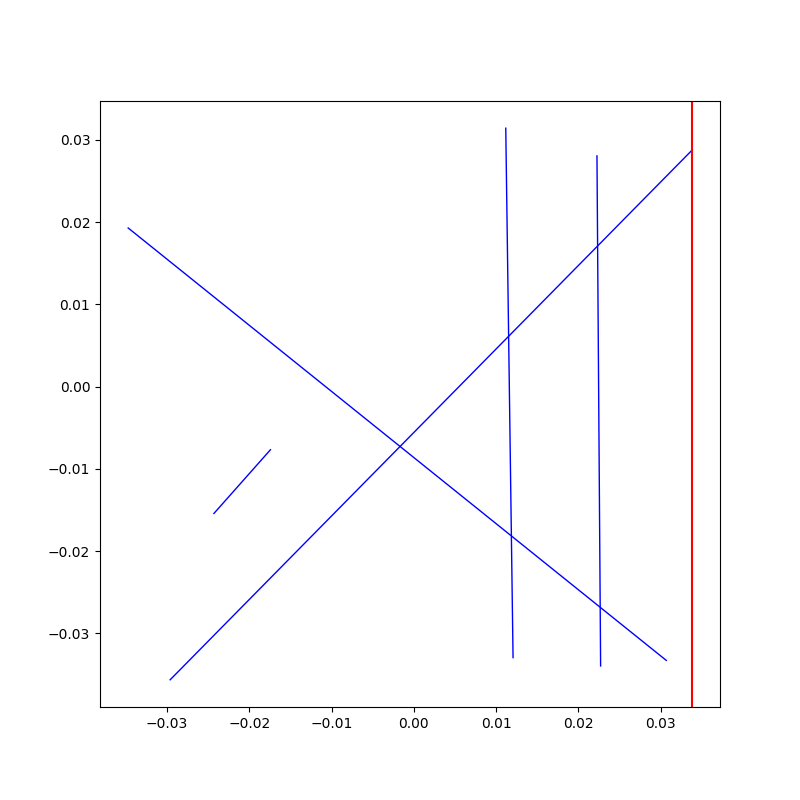

IndexError: list index out of range

In [421]:
E = 1e-12
D = 1e-8

def is_valid(section):
    return section.pr[0] != section.pl[0]

def find_intersections_brut(sections):
    n = len(sections)    
    result = []
    start = time()
    for i in range(n):
        for j in range(i+1, n):
            if(doIntersect(*sections[i], *sections[j])):
                result.append(get_intersection(sections[i],sections[j]))
    end = time()
    draw_state(sections,[],[],result,(0,0))
    return result

def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    result = []
    handled = []
    segments = [LineSegment(Point(x1,y1,line_index=i),Point(x2,y2,line_index=i), index=i) for i, [(x1,y1), (x2,y2)] in enumerate(sections)]
    events = EventsStructure()
    checked = set()
    start = time()
    for s in segments:
        if is_valid(s):
            events.add_event(Point(s.pl.x,s.pl.y,s.index,PointType.START))
            events.add_event(Point(s.pr.x,s.pr.y,s.index,PointType.END))
    lines = SegmentList()
    while(len(events)>0):
        last = events.top()
        event: Point = events.get_event()
        # print(lines)
        # match event.point_type:
        if True:
            if event.point_type == PointType.START:
            # case PointType.START:
                lines.set_x(event.x)
                s = segments[event.line_index]
                print(f"Adding point {s}")
                lines.insert(s)
                prev, next_ = lines.find_previous_and_next_segment(s)
                events.add_cross_event(prev,s,checked)
                events.add_cross_event(s,next_,checked)
            # case PointType.END:
            elif event.point_type == PointType.END:
                lines.set_x(event.x)
                s = segments[event.line_index]
                prev, next_ = lines.find_previous_and_next_segment(s)
                events.add_cross_event(prev,next_,checked)
                lines.remove(s)
            # case PointType.CROSS:
            elif event.point_type == PointType.CROSS:
                first_index, second_index = event.line_index, event.other_line
                first_segment, second_segment = segments[first_index], segments[second_index]
                prev1, next1 = lines.find_previous_and_next_segment(first_segment)
                prev2, next2 = lines.find_previous_and_next_segment(second_segment)
                first_segment_upper_neighbour = prev1 if prev1 != second_segment else next1
                second_segment_lower_neighbour = prev2 if prev2 != first_segment else next2
                result.append(event)
                lines.remove(first_segment)
                lines.remove(second_segment)
                moved_x = event.x + D
                lines.set_x(moved_x)
                new_first_segment = LineSegment(first_segment.pl,first_segment.pr,first_segment.index)
                new_second_segment = LineSegment(second_segment.pl,second_segment.pr,second_segment.index)
                lines.insert(new_first_segment)
                lines.insert(new_second_segment)
                events.add_cross_event(new_first_segment, first_segment_upper_neighbour, checked) 
                events.add_cross_event(new_second_segment, second_segment_lower_neighbour, checked) 
        handled.append(event)
        print(result)
    end = time()
    
    draw_state(sections,[],events.mainHeap,result,last)
    return result, (end - start)

Test().runtest(3, find_intersections)

In [ ]:

# class Tree:
#     def __init__(self,point: Point,comparator=None,equals=None):
#         self.root = Node(point)
#         self.comparator = comparator or (lambda a, b, x=None: a.compare_at(b, x) if isinstance(a, Line) else (a < b))
#         self.equals = equals or (lambda a, b, x=None: a.equal_at(b, x) if isinstance(a, Line) and isinstance(b, Line) else (a == b))
#     def __str__(self):
#         def print_node(node, prefix="", is_left=True):
#             if node is None:
#                 return ""
#             result = []
#             result.append(prefix + ("|-- " if is_left else "\\-- ") + str(node.value))
#             if node.left or node.right:
#                 if node.left:
#                     result.append(print_node(node.left, prefix + ("|   " if is_left else "    "), True))
#                 else:
#                     result.append(prefix + ("|   " if is_left else "    ") + "|-- None")
#                 if node.right:
#                     result.append(print_node(node.right, prefix + ("|   " if is_left else "    "), False))
#                 else:
#                     result.append(prefix + ("|   " if is_left else "    ") + "\\-- None")
#             return "\n".join(result)
#         return print_node(self.root, "", True)
    
#     def get_height_from(self,current,counter=1):
#         if current == None:
#             return counter
#         return max(counter,self.get_height_from(current.left,counter+1),self.get_height_from(current.right,counter+1))
    
#     def __len__(self):
#         return self.get_size()
    
#     def get_size(self):
#         return self.get_size_from(self.root)

#     def get_size_from(self,current):
#         if current == None:
#             return 0
#         return self.get_size_from(current.left) + 1 + self.get_size_from(current.right)

#     def get_height(self):
#         return self.get_height_from(self.root)
    
#     def search_value(self,value: Line,x):
#         return self.search_value_from(self.root,value,x)
#     def search_value_from(self, current, value, x):
#         if current == None:
#             return None
#         if current.value.equals(value,x):
#             return current
#         # if current.value. < value:
#         if self.comparator(current.value,value,x):
#             return self.search_value_from(current.left,value,x)
#         else:
#             return self.search_value_from(current.right,value,x)
    
#     def insert_value(self,value: Point):
#         self.insert_value_from(self.root,value)
#     def insert_value_from(self,current,value):
#         # if current.value < value:
#         if self.compare(current.value,value):
#             if current.left == None:
#                 current.left = Node(value)
#             else:
#                 self.insert_value_from(current.left,value)
#         else:
#             if current.right == None:
#                 current.right = Node(value)
#             else:
#                 self.insert_value_from(current.right,value)
    
#     def get_first_from(self,current):
#         while (current.left != None):
#             current = current.left
#         return current
#     def get_first(self):
#         return self.get_last_from(self.root)

#     def get_last_from(self,current):
#         while (current.right != None):
#             current = current.right
#         return current
#     def get_last(self):
#         return self.get_last_from(self.root)
    
#     def find_next(self):
#         return self.find_next_from(self.root,self.root.value)    
#     def find_next_from(self, current, key, next_, x):
#         if (current == None):
#             return next_
#         if (current.value < key  and current.value != key):
#             next_ = next_.smaller(current.value)
#             return self.find_next_from(current.left, key, next_)
#         return self.find_next_from(current.right, key, next_)

#     def find_prev(self, key, x):
#         return self.find_prev_from(self.root,key,self.root)
#     def find_prev_from(self,current,key,prev):
#         if (current == None):
#             return prev
#         if (current.value > key  and current.value != key):
#             prev = prev.greater(current.value)
#             return self.find_next_from(current.left, key, prev)
#         return self.find_next_from(current.right, key, prev)

#     def flip(self, bst_points, ind1, ind2, x_test):
#         line1 = self.search_value_from(self.root, Line(Point(0, 0), Point(0, 0), ind1))
#         line2 = self.search_value_from(self.root, Line(Point(0, 0), Point(0, 0), ind2))
        
#         if line1 is None or line2 is None:
#             raise ValueError("One or both lines not found in the BST.")
        
#         # Swap the values of the nodes
#         line1.value, line2.value = line2.value, line1.value

#         # Update the intersections
#         line1.value.set_x(x_test)
#         line2.value.set_x(x_test)
#         top = self.find_next_from(self.root, line2.value, None)
#         bottom = self.find_prev_from(self.root, line1.value, None)

#         if top and doIntersect(top.value, line1.value):
#             x, y = get_intersection(top.value, line1.value)
#             bst_points.insert_value(Point(x, y, top.value.index, line1.value.index))
        
#         if bottom and doIntersect(bottom.value, line2.value):
#             x, y = get_intersection(bottom.value, line2.value)
#             bst_points.insert_value(Point(x, y, bottom.value.index, line2.value.index))

#     def remove_from(self, current, key):
#         if current is None:
#             return current

#         if key < current.value:
#             current.left = self.remove_from(current.left, key)
#         elif key > current.value:
#             current.right = self.remove_from(current.right, key)
#         else:
#             if current.left is None:
#                 return current.right
#             elif current.right is None:
#                 return current.left

#             # Find the smallest value in the right subtree
#             temp = self.get_first_from(current.right)
#             current.value = temp.value
#             current.right = self.remove_from(current.right, temp.value)

#         return current

#     def remove_prepare(self, key, x):
#         self.root = self.remove_prepare_from(self.root, key, x)

#     def remove_prepare_from(self, current, key, x):
#         if current is None:
#             return current

#         if key < current.value:
#             current.left = self.remove_prepare_from(current.left, key, x)
#         elif key > current.value:
#             current.right = self.remove_prepare_from(current.right, key, x)
#         else:
#             if current.left is None:
#                 return current.right
#             elif current.right is None:
#                 return current.left

#             temp = self.get_first_from(current.right)
#             current.value = temp.value
#             current.right = self.remove_prepare_from(current.right, temp.value, x)

#         return current
#     def bst_to_list(self):
#         def transform(current):
#             if(current == None):
#                 return []
#             return current + transform(current) + transform(current)
#         return transform(self.root)


Uzupełnij funkcję ```find_intersections_with_visualization```

In [ ]:
import matplotlib.pyplot as plt

def get_points(n):
    return [ (uniform(-10,10),uniform(-10,10)) for _ in range(n) ]

def draw_state(sections,current,points,events,current_point):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    dy = 1e-5

    # Wszystkie odcinki
    for section in sections:
        x_vals, y_vals = [section[0][0], section[1][0]], [section[0][1], section[1][1]]
        ax.plot(x_vals, y_vals, color='blue', zorder=1, lw=1)

    # Odcinki aktywne
    for section in current:
        x_vals, y_vals = [section[0][0], section[1][0]], [section[0][1], section[1][1]]
        ax.plot(x_vals, y_vals, color='red', zorder=1, lw=1)

    # Punkty zdarzeń
    for (x, y,_) in points:
        ax.scatter(x, y, color='red', zorder=1, label=f'Punkty zdarzeń')

    # Punkty obsłużone
    for (x,y,_) in events:
        ax.scatter(x, y, color='green', zorder=1, label=f'Punkty obsłużone')
    
    # Miotła
    ax.axline((current_point.x,current_point.y),(current_point.x,current_point.y+dy), color='red', label="Miotła")

    ax.autoscale()
    plt.show()
    # plt.savefig(filename)
    plt.close()

def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    n = len(sections)
    # vis1 = Visualizer()
    # vis1.add_line_segment(sections, color = "green")
    interpoints = []
    points = [ p2 for _,p2 in sections ] + [ p1 for p1,_ in sections ] 
    for i in range(n):
        for j in range(i+1, n):
            print(doIntersect(sections[i], sections[j]))
            if(doIntersect(sections[i], sections[j])):
                x, y = get_intersection(sections[i], sections[j])
                interpoints.append((x, y))
            draw_state(sections,[sections[i],sections[j]],interpoints,points,interpoints[-1])
    print("\nWYNIKI DLA BRUTA:")
    for i in range(len(interpoints)):
        print('(', round(interpoints[i][0], 3), round(interpoints[i][1], 3), ')')
    print()

def draw_frame(sections, current,points,events, filename):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    # Wszystkie odcinki
    for section in sections:
        x_vals, y_vals = [section[0][0], section[1][0]], [section[0][1], section[1][1]]
        ax.plot(x_vals, y_vals, color='blue', zorder=1, lw=1)

    # Odcinki aktywne
    for section in current:
        x_vals, y_vals = [section[0][0], section[1][0]], [section[0][1], section[1][1]]
        ax.plot(x_vals, y_vals, color='red', zorder=1, lw=1)

    # Punkty zdarzeń
    for idx, (x, y) in enumerate(points):
        ax.scatter(x, y, color='red', zorder=1, label=f'Point {idx}' if idx == 0 else None)

    # Punkty obsłużone
    for idx, (x,y) in enumerate(events):
        ax.scatter(x, y, color='green', zorder=1, label=f'Point {idx}' if idx == 0 else None)


    ax.autoscale()
    plt.savefig(filename)
    plt.close()

def find_intersections_visualized(sections, gif_name='find_cuts.gif'):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    result = []
    handled = []
    segments = [LineSegment(Point(x1,y1,line_index=i),Point(x2,y2,line_index=i), index=i) for i, [(x1,y1), (x2,y2)] in enumerate(sections)]
    events = EventsStructure()
    checked = set()
    start = time()
    for s in segments:
        if is_valid(s):
            events.add_event(Point(s.pl.x,s.pl.y,s.index,PointType.START))
            events.add_event(Point(s.pr.x,s.pr.y,s.index,PointType.END))
    lines = SegmentList()
    filenames = []
    # Należy wrzucić działający algorytm i dać save_frame() przy klatkach
    def save_frame():
        nonlocal filenames
        filename = f"frame_{len(filenames)}.png"
        draw_frame(sections,lines.__repr__(),events.mainHeap, result, events.top(), filename)
        filenames.append(filename)

    # Tutaj działający już kod

    save_frame()  # Stan początkowy
    images = [plt.imread(fname) for fname in filenames]
    plt.figure()
    plt.imshow(images[0])
    ani = animation.ArtistAnimation(plt.gcf(), [[plt.imshow(img)] for img in images], interval=500)
    ani.save(gif_name, writer='pillow')
    
    for fname in filenames:
        os.remove(fname)

    return result

# Wyznaczanie tabeli czasowych

In [ ]:
points_set = [(generate_set_a,"Zbiór A"),(generate_set_b,"Zbiór B"),(generate_set_c,"Zbiór C"),(generate_set_d,"Zbiór D"),(generate_set_e,"Zbiór E")]
lengths = [ i for i in range(10000,100000,10000) ]
for generator, name in points_set:
    data = []
    for n in lengths:
        points = generator(n if name != "Zbiór B" else n // 100)
        if n < 30000:
            answer_brut, time_brut = find_intersections_brut(points)
        answer_sweepline, time_tree = find_intersections(points)
        if len(answer_sweepline) != len(answer_brut):
            print("================ ROZBIEŻNOŚĆ ================")
            print(f"{len(answer_brut)} {answer_brut}")
            print(f"{len(answer_sweepline)} {answer_sweepline}")
        data.append({"sections":len(points) , "brut":time_brut*1000000, "tree":time_tree*1000000,"cuts":len(answer_sweepline)})
    create_tex_table("Wyniki",data) 

KeyboardInterrupt: 

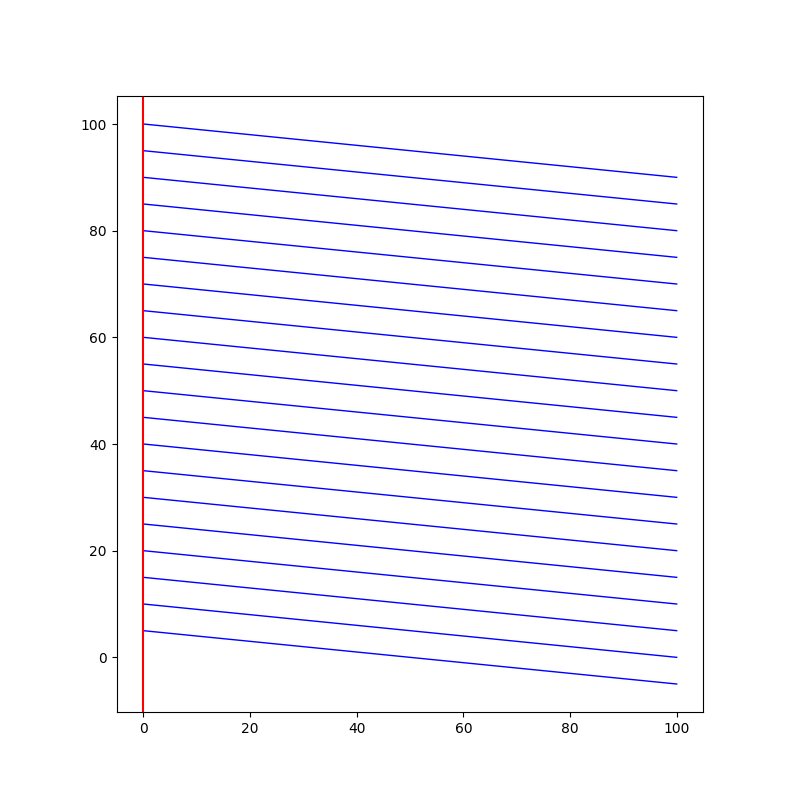

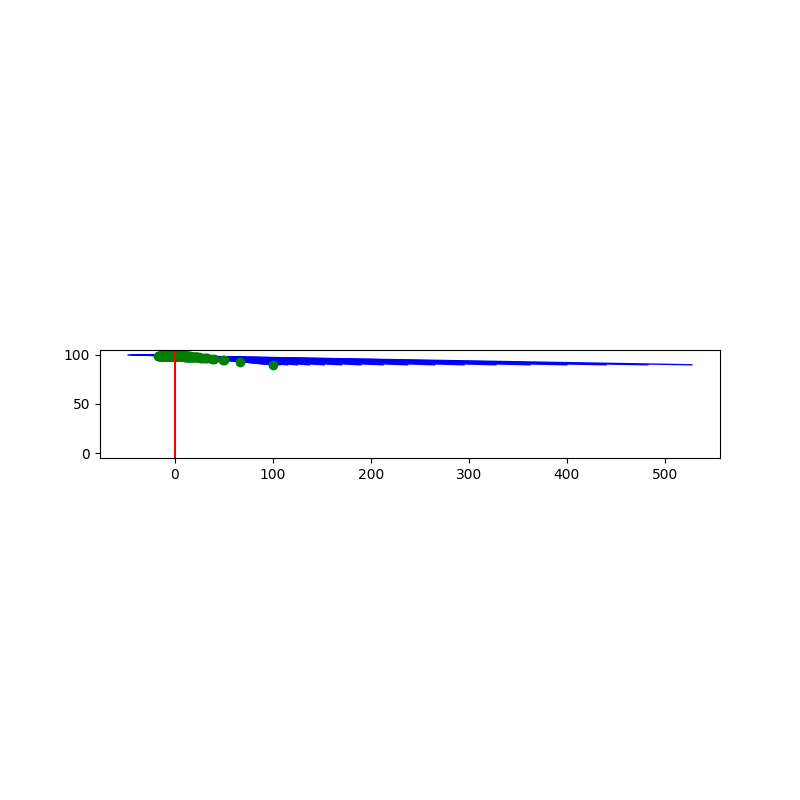

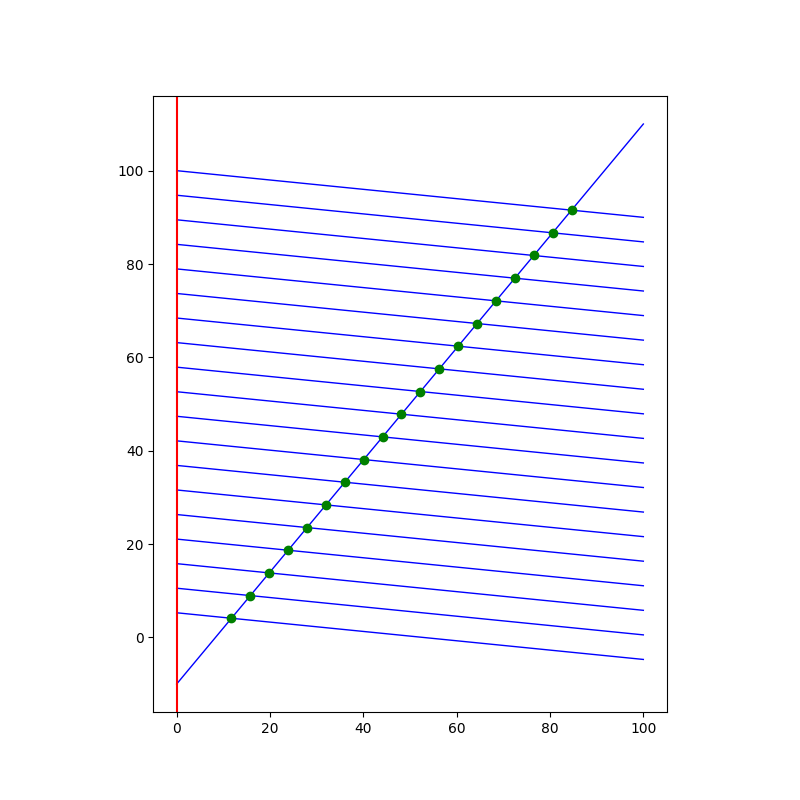

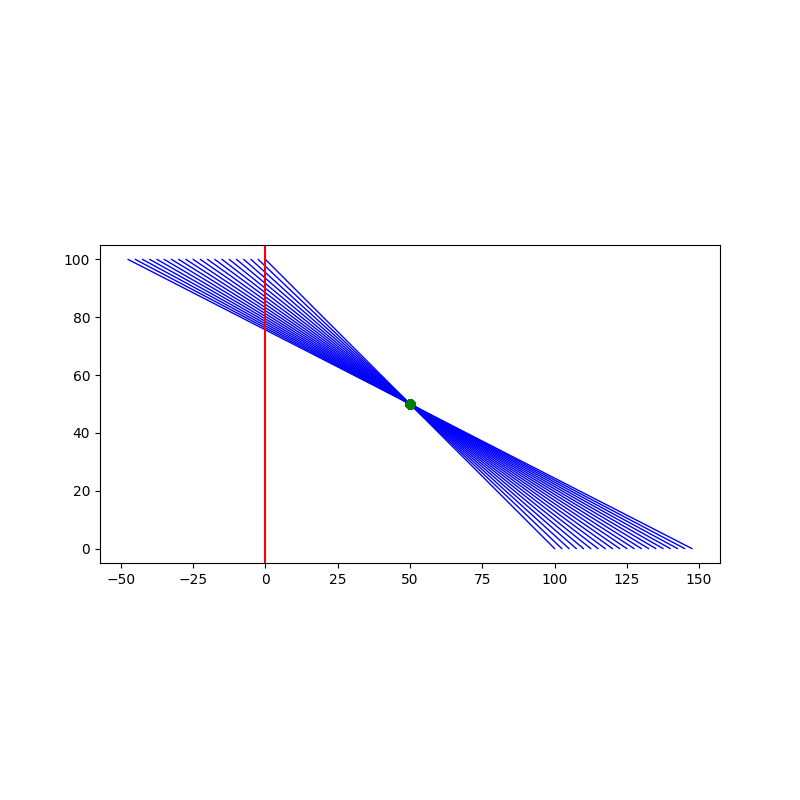

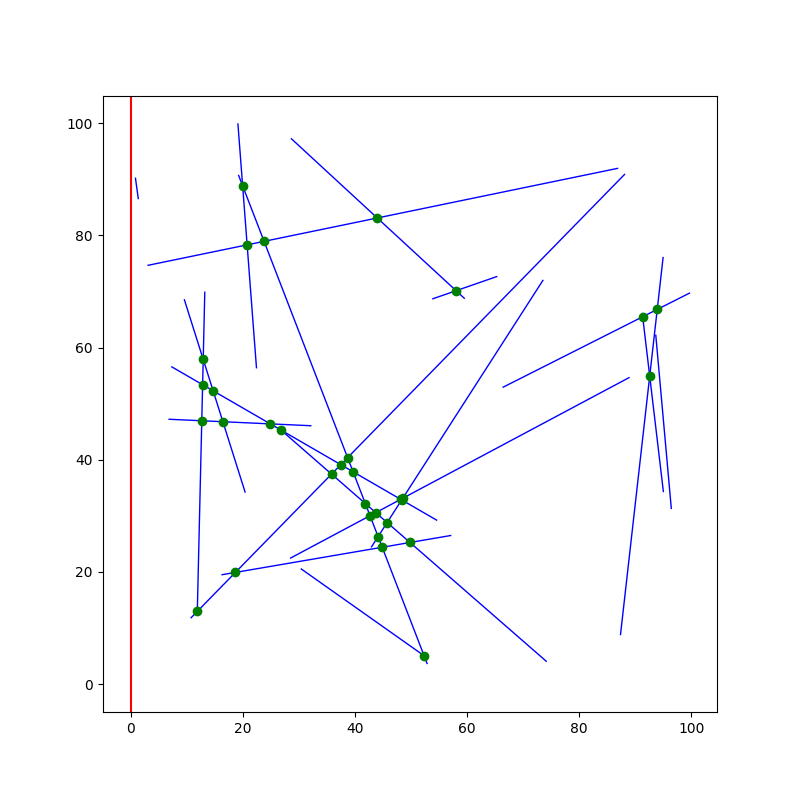

In [422]:

def get_parameters(section):
    P1,P2 = section
    x1,y1 = P1
    x2,y2 = P2
    a = (y1-y2)/(x1-x2)
    b = y1 - a*x1
    return (a,b)
def get_intersection(section1,section2):
    a1,b1 = get_parameters(section1)
    a2,b2 = get_parameters(section2)
    x = (b1-b2)/(a2-a1)
    y = a1*x+b1
    return (x,y,1)
def find_intersections_brut_vis(sections):
    n = len(sections)    
    result = []
    start = time()
    for i in range(n):
        for j in range(i+1, n):
            if(doIntersect(*sections[i], *sections[j])):
                result.append(get_intersection(sections[i],sections[j]))
    end = time()
    draw_state(sections,[],[],result,Point(0,0,None,PointType.START))
    return result

points_set = [(generate_set_a,"Zbiór A"),(generate_set_b,"Zbiór B"),(generate_set_c,"Zbiór C"),(generate_set_d,"Zbiór D"),(generate_set_e,"Zbiór E")]
for generator, name in points_set:
        points = generator(20)
        answer_brut = find_intersections_brut_vis(points)


### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

W strukturze zdarzeń żadne zmiany nie były konieczne, ponieważ w taki sam sposób przechodzimy od punktu początkowego prostej do punktu końcowego


### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
def on_segment(p, q, r):
    # Check if point q lies on the line segment pr
    return (q[0] <= max(p[0], r[0]) and q[0] >= min(p[0], r[0]) and
            q[1] <= max(p[1], r[1]) and q[1] >= min(p[1], r[1]))

def det(a, b, c):
    # Determinant helper function
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

def orientation(a, b, c, epsilon=1e-18):
    # Orientation function
    d = det(a, b, c)
    if d > epsilon:
        return 1  # Clockwise
    elif d < -epsilon:
        return 2  # Counterclockwise
    else:
        return 0  # Collinear

def doIntersect(section1: tuple, section2: tuple):
    p1, p2 = section1
    q1, q2 = section2

    # Find the orientations
    o1 = orientation(p1, p2, q1)
    o2 = orientation(p1, p2, q2)
    o3 = orientation(q1, q2, p1)
    o4 = orientation(q1, q2, p2)

    # General case: two segments intersect if orientations differ
    if o1 != o2 and o3 != o4:
        return True

    # Special cases: Check if points are collinear and lie on the segments
    if o1 == 0 and on_segment(p1, q1, p2):
        return True
    if o2 == 0 and on_segment(p1, q2, p2):
        return True
    if o3 == 0 and on_segment(q1, p1, q2):
        return True
    if o4 == 0 and on_segment(q1, p2, q2):
        return True

    return False


def compare(a,b,c):
  # compare b with c
  # a is the point according to which we sort
  
  EPS = 10**(-24)

  result = det(a,b,c)
  if(abs(result) <= EPS):
    return 0
  elif(result < 0):
    return -1
  elif(result > 0):
    return 1

def get_parameters(section):
    P1,P2 = section
    x1,y1 = P1
    x2,y2 = P2
    a = (y1-y2)/(x1-x2)
    b = y1 - a*x1
    return (a,b)

def get_intersection(section1,section2):
    a1,b1 = get_parameters(section1)
    a2,b2 = get_parameters(section2)
    if a1 == a2:
        return None, None
    x = (b1-b2)/(a2-a1)
    y = a1*x+b1
    return (x,y)

testing_sections = (((-0.5, 0.5), (8.5, 3.5)),
                     ((1, 3), (7, 5)),
                     ((2, 4), (5, 1)),
                     ((4.5, 3), (6.5, 6)),
                     ((0, 5), (5.5, 5.5)))
find_intersections_with_visualization(testing_sections)

### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.